In [18]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap

def smooth_data(data, window_size=10):
    """Apply a simple moving average smoothing to the data."""
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

def plot_rewards_with_opacity(exp_res, test_res, title, xlabel, ylabel, img_name):
    # Compute scores for each configuration based on test_res
    scores = {}
    for key, rewards in test_res.items():
        test_mean = np.mean(rewards)
        test_std = np.std(rewards)
        scores[key] = test_mean - 0.5 * test_std  # Overall score balancing mean and stability

    # Dynamically select top 5 keys based on the scores
    top5_keys = sorted(scores, key=scores.get, reverse=True)[:5]

    # Create the color palette using 'Set3' for top 5 configurations
    set3_colors = cm.get_cmap('Set3', len(top5_keys)).colors  # Extract colors for top 5
    muted_color = "gray"  # Color for other configurations

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))

    for idx, (key, rewards) in enumerate(exp_res.items()):
        smoothed_rewards = smooth_data(rewards, window_size=100)
        if key in top5_keys:
            color = set3_colors[top5_keys.index(key)]  # Assign a 'Set3' color for top 5
            alpha = 1.0
            linewidth = 1.1
        else:
            color = muted_color  # Use muted gray for other configurations
            alpha = 0.05
            linewidth = 0.7

        ax.plot(range(1, len(smoothed_rewards) + 1), smoothed_rewards, 
                label=key if key in top5_keys else None, 
                color=color, alpha=alpha, linewidth=linewidth)

    # Set title and axis labels
    ax.set_title(title, fontweight='bold', fontsize=18)
    ax.set_xlabel(xlabel, fontweight='bold')
    ax.set_ylabel(ylabel, fontweight='bold')

    # Show legend only for top 5 combinations, positioned in the upper left
    ax.legend(loc='upper left', 
              fancybox=True, 
              fontsize='small', 
              markerscale=0.5)

    # Save the plot
    fig.savefig(f'../img/{img_name}.png', dpi=600)
    plt.tight_layout()  # Ensures the legend does not get clipped
    plt.show()

In [19]:
with open("../exp_data/comparison_tr.pkl", "rb") as f:
   exp_res1 = pickle.load(f)
with open("../exp_data/comparison_test.pkl", "rb") as f:
   test_res1 = pickle.load(f)
with open("../exp_data/comparison2_tr.pkl", "rb") as f:
   exp_res2 = pickle.load(f)
with open("../exp_data/comparison2_test.pkl", "rb") as f:
   test_res2 = pickle.load(f)
exp_res=exp_res1 | exp_res2
test_res=test_res1 | test_res2

/tmp/ipykernel_458989/1352908127.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  set3_colors = cm.get_cmap('Set3', len(top5_keys)).colors  # Extract colors for top 5


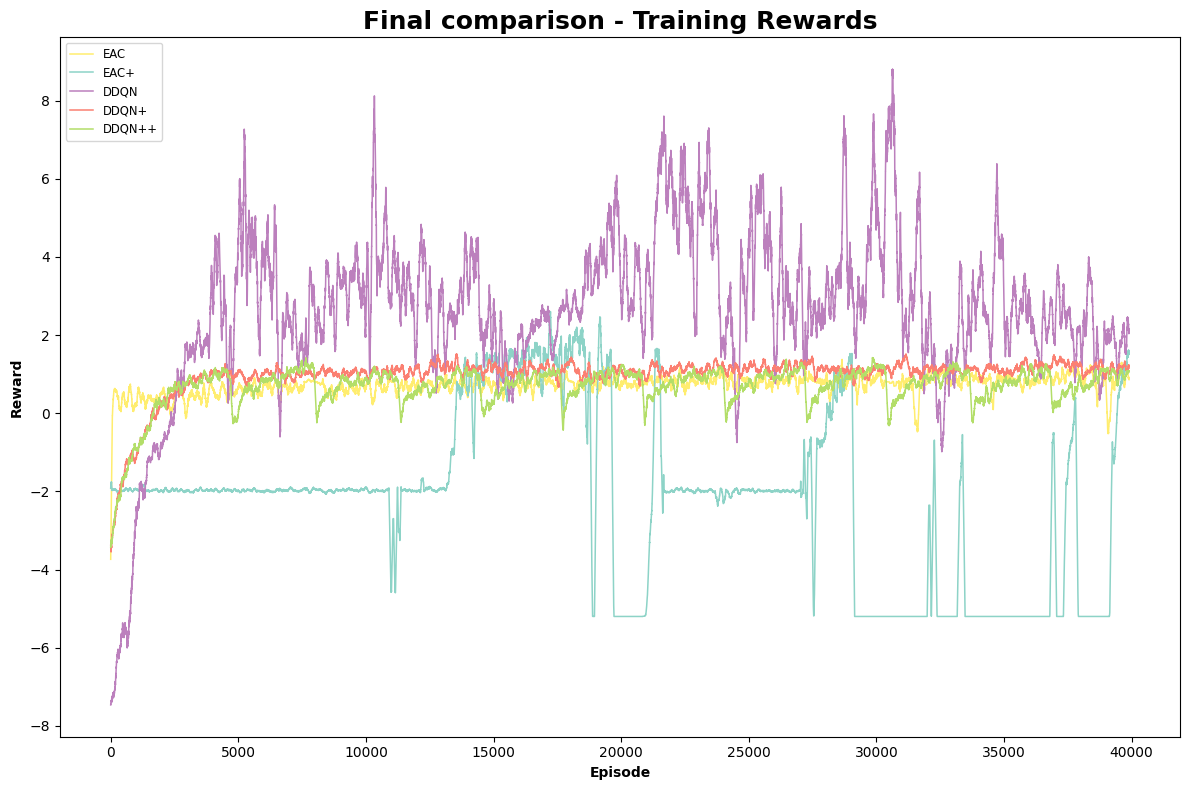

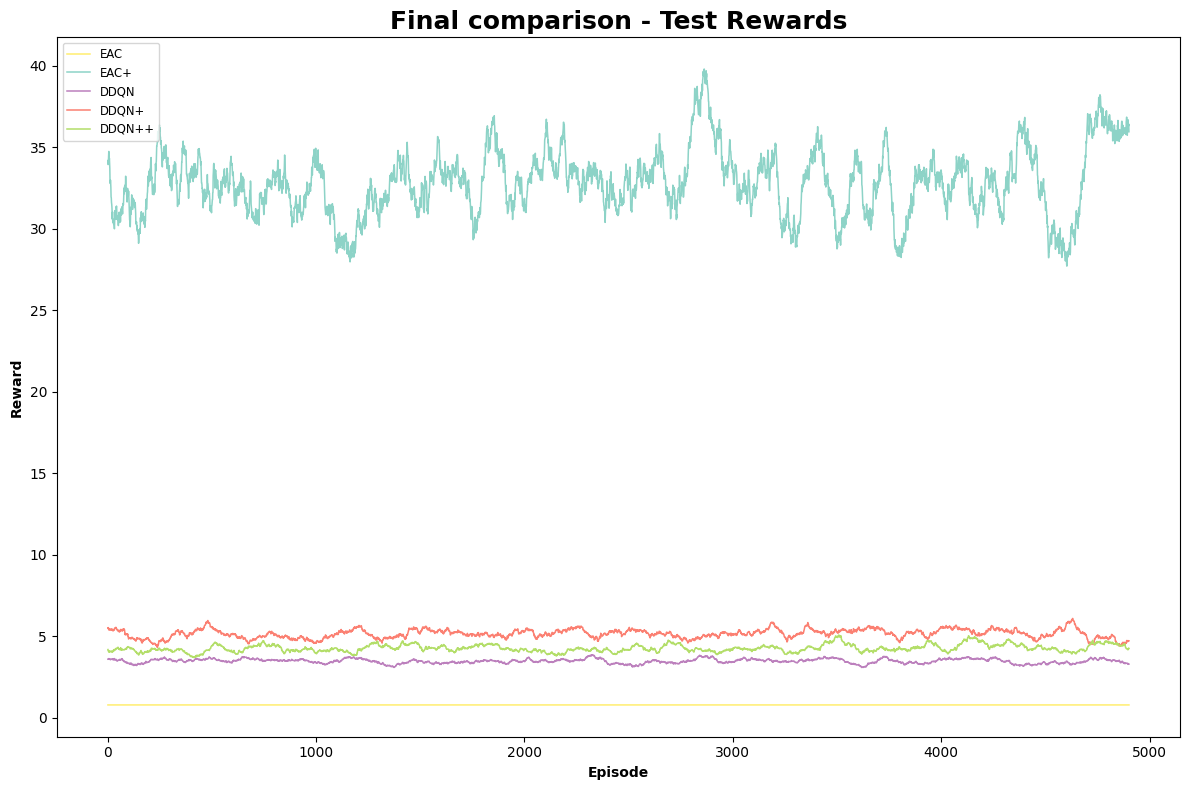

In [20]:
plot_rewards_with_opacity(exp_res,test_res, "Final comparison - Training Rewards", "Episode", "Reward","comparison_tr.png")

# Plot for test_res (test rewards)
plot_rewards_with_opacity(test_res,test_res, "Final comparison - Test Rewards", "Episode", "Reward","comparison_test.png")

In [24]:
with open("../exp_data/comparison_tr.pkl", "wb") as f:
    pickle.dump(exp_res, f)
with open("../exp_data/comparison_test.pkl", "wb") as f:
    pickle.dump(test_res, f)

In [27]:
for i in exp_res:
    print("learning")
    print(f"{i} >> mean: {np.mean(exp_res[i])}  //  std:{np.std(exp_res[i])}")
print("")
for i in test_res:
    print("test")
    print(f"{i} >> mean: {np.mean(test_res[i])}  //  std:{np.std(test_res[i])}")

learning
EAC >> mean: 0.7197463512420654  //  std:0.9921632409095764
learning
EAC+ >> mean: -2.1877026557922363  //  std:2.3940107822418213
learning
DDQN >> mean: 2.630634307861328  //  std:4.292889595031738
learning
DDQN+ >> mean: 0.9667767286300659  //  std:0.9563034772872925
learning
DDQN++ >> mean: 0.6772519946098328  //  std:1.0161775350570679

test
EAC >> mean: 0.7999994158744812  //  std:5.960464477539063e-08
test
EAC+ >> mean: 32.87992477416992  //  std:21.854616165161133
test
DDQN >> mean: 3.4859774112701416  //  std:1.4762698411941528
test
DDQN+ >> mean: 5.164578914642334  //  std:2.926790952682495
test
DDQN++ >> mean: 4.276057720184326  //  std:2.23709774017334
